In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
baseball = pd.read_csv('baseball_players.csv')

In [124]:
baseball_MVP = baseball[['RBI','batting_avg','WAR','Salary','games','age','H','slugging_perc','adv_bat_re24_bat']]
baseball_MVP = baseball_MVP.dropna()

In [125]:
baseball_MVP['Salary'] = baseball_MVP['Salary'].str.replace('$','').str.replace(',','').astype(int)

In [138]:
X_variables = baseball_MVP[['RBI', 'batting_avg','WAR','games','age','H','slugging_perc','adv_bat_re24_bat']]
X_variables['age^2'] = X_variables['age'] * X_variables['age']
X_variables['games^2'] = X_variables['games'] = X_variables['games']
X_variables.drop(['age^2'],inplace=True,axis=1)
y_variables = baseball_MVP[['Salary']]

In [139]:
X, X_test, y, y_test = train_test_split(X_variables,y_variables,test_size=.20,random_state=13)

In [140]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.20, random_state=13)

In [141]:
scaler = StandardScaler()

In [142]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [143]:
X_train = scaler.transform(X_train)

In [150]:
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [151]:
model = LinearRegression()

In [152]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
model.score(X_test,y_test)

0.386702442364416

In [155]:
mean_squared_error(model.predict(X_test), y_test, squared=False)

5049543.58831603

For my MVP, I am taking eight variables that I view to be collinear and use them to create a basic Linear Regression model. The biggest increase in R^2 came when I added age and games to the training data so those are currently the most important. I see an R^2 value of .38 and a RMSE of 5,049,543 so there is much improvement that can be done. In my next steps, I will try to log transform salary because of the wide range of values.

In [156]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

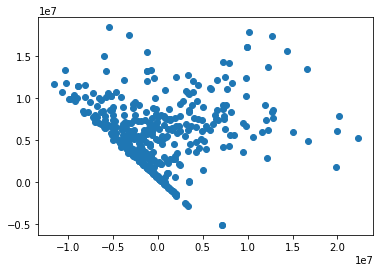

In [157]:
plt.scatter(residuals,y_pred)

We do see a trend in the residuals meaning that one of the assumptions of linear regression is being broken.